In [153]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import itertools
import json
from sklearn import metrics

In [154]:
# Meta statistics
sl_set = []
OOV_count_set = []
vocab_count_set = []
sl_stats_set = []

datasets = ["unaligned.en", "unaligned.fr", "train.lang1", "train.lang2"]

In [155]:
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
real_vocab = {}
with open("processed/unaligned.en", "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))
# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
real_vocab = vocab_alpha.copy()
real_vocab['num'] = sum(OOV.values()) # Could be removed
real_vocab = {k: v / total for total in (sum(real_vocab.values(), 0.0),) for k, v in real_vocab.items()}
real_vocab = {k: v for k, v in sorted(real_vocab.items(), key=lambda item: item[1], reverse=True)}
# with open( path +'.json', 'w') as fp:
#     json.dump(real_vocab, fp)
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 10))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))


Word Count Total:  8820344
Total Vocab Size by Words:  60008
OOV Size:  2715
Net Vocab Size:  57293
Word Frequency Info:  {'min': 1, 'max': 585841, 'mean': 151.36370935367322, 'std': 3697.307529119359}
Most Common Words:  {'the': 585841, 'to': 279419, 'of': 275207, 'and': 226316, 'in': 190930, 'a': 163817, 'is': 154142, 'that': 153805, 'i': 110767, 'we': 99798}
Sentence Length Info:  {'min': 1, 'max': 180, 'mean': 18.608320675105485, 'std': 9.763772743797661}


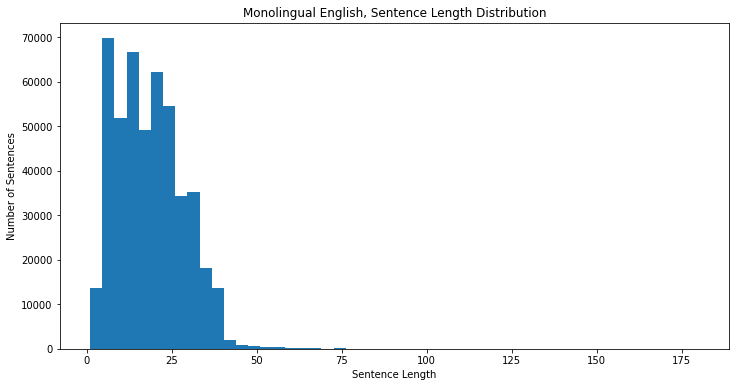

In [156]:
plt.figure(figsize=[12,6])
plt.hist(sl, bins=50)
plt.title("Monolingual English, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

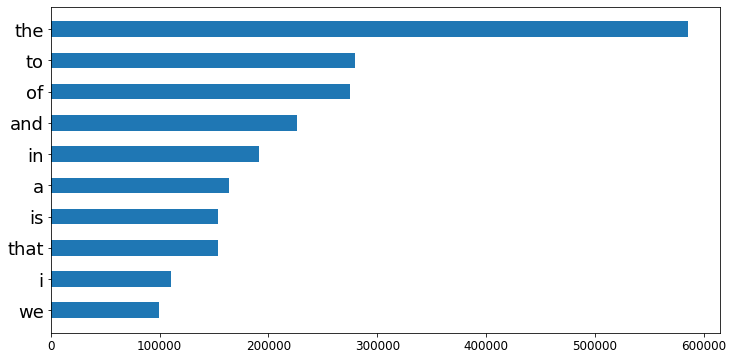

In [157]:
k = list(top.keys())[::-1]
v = list(top.values())[::-1]
plt.figure(figsize=[12,6])
plt.barh(k, v, height=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.savefig("uni_en_freq_w.jpg")

In [158]:
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
real_vocab = {}
with open("processed/unaligned.fr", "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))
# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
real_vocab = vocab_alpha.copy()
real_vocab['num'] = sum(OOV.values()) # Could be removed
real_vocab = {k: v / total for total in (sum(real_vocab.values(), 0.0),) for k, v in real_vocab.items()}
real_vocab = {k: v for k, v in sorted(real_vocab.items(), key=lambda item: item[1], reverse=True)}
# with open( path +'.json', 'w') as fp:
#     json.dump(real_vocab, fp)
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 10))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))


Word Count Total:  9746232
Total Vocab Size by Words:  83314
OOV Size:  2545
Net Vocab Size:  80769
Word Frequency Info:  {'min': 1, 'max': 462046, 'mean': 118.78731939234112, 'std': 3017.9261930933653}
Most Common Words:  {'de': 462046, 'la': 298409, 'et': 211018, 'le': 209347, 'les': 197208, 'à': 185613, "l'": 171036, 'des': 163300, 'que': 147798, 'en': 135833}
Sentence Length Info:  {'min': 1, 'max': 224, 'mean': 20.561670886075948, 'std': 10.823182771689924}


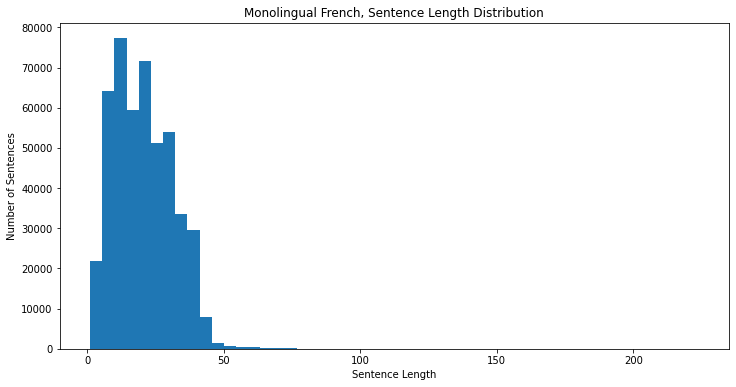

In [159]:
plt.figure(figsize=[12,6])
plt.hist(sl, bins=50)
plt.title("Monolingual French, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

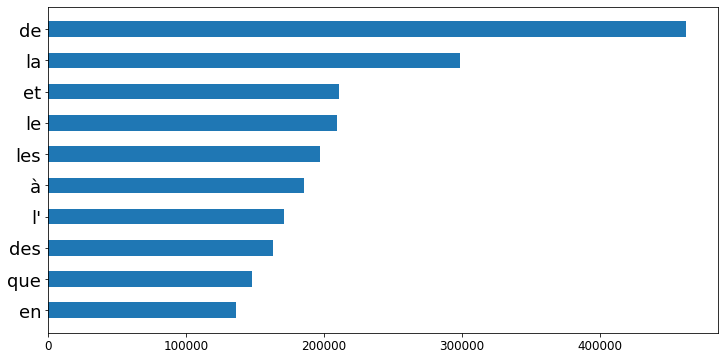

In [160]:
k = list(top.keys())[::-1]
v = list(top.values())[::-1]
plt.figure(figsize=[12,6])
plt.barh(k, v, height=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.savefig("uni_fr_freq_w.jpg")

In [161]:
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
real_vocab = {}
with open("processed/train.lang1", "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))
# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
real_vocab = vocab_alpha.copy()
real_vocab['num'] = sum(OOV.values()) # Could be removed
real_vocab = {k: v / total for total in (sum(real_vocab.values(), 0.0),) for k, v in real_vocab.items()}
real_vocab = {k: v for k, v in sorted(real_vocab.items(), key=lambda item: item[1], reverse=True)}
# with open( path +'.json', 'w') as fp:
#     json.dump(real_vocab, fp)
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 10))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))


Word Count Total:  205361
Total Vocab Size by Words:  13657
OOV Size:  341
Net Vocab Size:  13316
Word Frequency Info:  {'min': 1, 'max': 13787, 'mean': 15.155752478221688, 'std': 178.616138871287}
Most Common Words:  {'the': 13787, 'of': 6452, 'to': 6432, 'and': 5259, 'in': 4384, 'a': 3805, 'is': 3617, 'that': 3573, 'i': 2650, 'it': 2287}
Sentence Length Info:  {'min': 1, 'max': 95, 'mean': 18.66918181818182, 'std': 9.860615657694012}


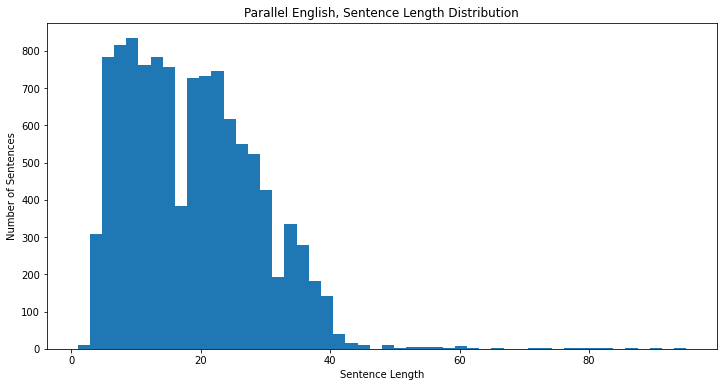

In [162]:
plt.figure(figsize=[12,6])
plt.hist(sl, bins=50)
plt.title("Parallel English, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

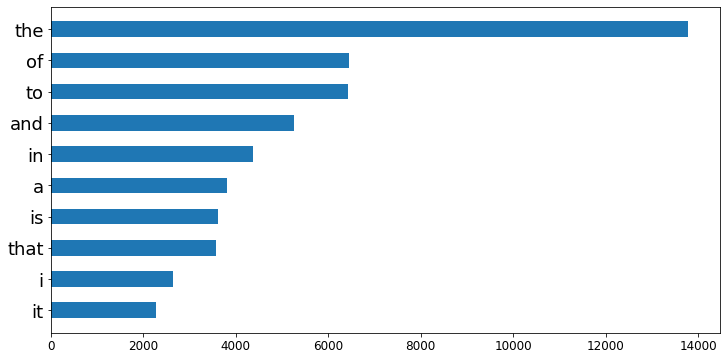

In [163]:
k = list(top.keys())[::-1]
v = list(top.values())[::-1]
plt.figure(figsize=[12,6])
plt.barh(k, v, height=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.savefig("p_en_freq_w.jpg")

In [164]:
bow = []
sentence_length = []
vocab_alpha = {}
OOV = {}
real_vocab = {}
with open("processed/train.lang2", "r") as text_file:
    for line in text_file:
        stripped_line = line.strip()
        bow.extend(stripped_line.split())
        sentence_length.append(len(stripped_line.split()))
# Word Count + Dictionary    
print("Word Count Total: ", sum(sentence_length))
vocab = pd.DataFrame(list(zip(bow, bow, [1] * len(bow))), columns =['Word', 'Token','Count']).groupby('Word',sort=False)['Token'].count().to_dict()
for word, count in vocab.items():
    if any(c.isalpha() for c in word):
        vocab_alpha[word] = count
    else:
        OOV[word] = count
real_vocab = vocab_alpha.copy()
real_vocab['num'] = sum(OOV.values()) # Could be removed
real_vocab = {k: v / total for total in (sum(real_vocab.values(), 0.0),) for k, v in real_vocab.items()}
real_vocab = {k: v for k, v in sorted(real_vocab.items(), key=lambda item: item[1], reverse=True)}
# with open( path +'.json', 'w') as fp:
#     json.dump(real_vocab, fp)
print("Total Vocab Size by Words: ", len(vocab))
print("OOV Size: ", len(OOV))
print("Net Vocab Size: ", len(vocab_alpha))

# Word Frequency
wf = np.asarray(list(vocab_alpha.values()))
wf_metrics = {"min": np.amin(wf), "max": np.amax(wf), "mean": np.mean(wf), "std": np.std(wf)}
print("Word Frequency Info: ", wf_metrics)

# Most Frequent Words
sorted_vocab = dict(sorted(vocab_alpha.items(), key=operator.itemgetter(1),reverse=True))
top = dict(itertools.islice(sorted_vocab.items(), 10))
print("Most Common Words: ", top)

# Sentence Lengths
sl = np.asarray(sentence_length)
sentence_len_metrics = {"min": np.amin(sl), "max": np.amax(sl), "mean": np.mean(sl), "std": np.std(sl)}
print("Sentence Length Info: ",sentence_len_metrics)

# Append to metadata
sl_set.append(sl)
OOV_count_set.append(len(OOV))
vocab_count_set.append(len(vocab_alpha))


Word Count Total:  227856
Total Vocab Size by Words:  18222
OOV Size:  327
Net Vocab Size:  17895
Word Frequency Info:  {'min': 1, 'max': 10548, 'mean': 12.521039396479464, 'std': 141.36399443666133}
Most Common Words:  {'de': 10548, 'la': 6400, 'et': 4612, 'le': 4525, 'à': 4335, 'les': 3982, 'des': 3675, "l'": 3625, 'que': 3431, 'est': 3032}
Sentence Length Info:  {'min': 1, 'max': 105, 'mean': 20.714181818181817, 'std': 10.912683977982034}


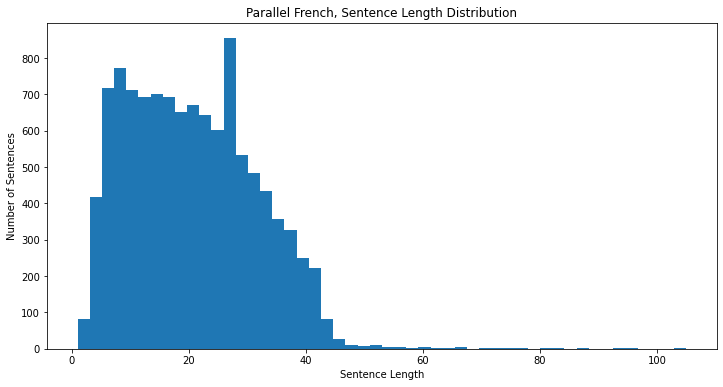

In [165]:
plt.figure(figsize=[12,6])
plt.hist(sl, bins=50)
plt.title("Parallel French, Sentence Length Distribution")
plt.ylabel('Number of Sentences',fontsize=10)
plt.xlabel('Sentence Length',fontsize=10)
plt.show()

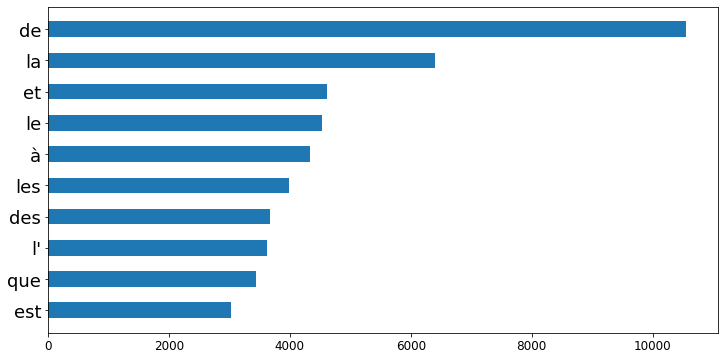

In [166]:
k = list(top.keys())[::-1]
v = list(top.values())[::-1]
plt.figure(figsize=[12,6])
plt.barh(k, v, height=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.savefig("p_fr_freq_w.jpg")

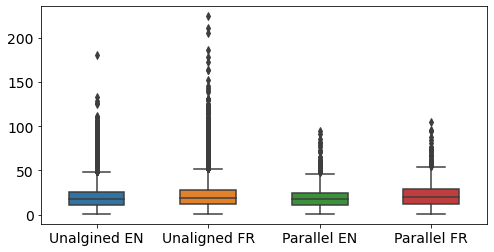

In [190]:
# Sentence Lengths
plt.figure(figsize=[8,4])
sns.boxplot(data = sl_set,width=0.5,whis=1.5)
plt.yticks(fontsize=14)
plt.xticks([0, 1, 2, 3], ['Unalgined EN', 'Unaligned FR', 'Parallel EN', 'Parallel FR'], fontsize=14)
plt.savefig("sl_box.jpg")

In [52]:
print(sl_set)

[array([22, 29,  6, ..., 12, 34, 30]), array([26, 39,  7, ...,  8, 15, 37]), array([11, 35,  8, ..., 11, 17, 17]), array([10, 32,  9, ..., 10, 13, 22])]


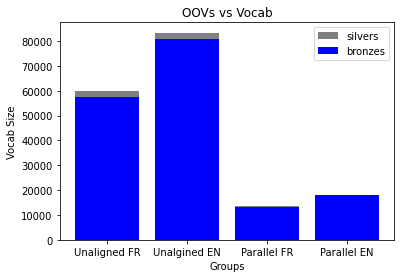

In [53]:
# OOVs in relation to real vocab
groups = ['Unaligned FR', 'Unalgined EN', 'Parallel FR', 'Parallel EN']
oovs = np.asarray(OOV_count_set)
reals = np.asarray(vocab_count_set)
ind = [x for x, _ in enumerate(groups)]

plt.bar(ind, oovs, width=0.8, label='silvers', color='grey', bottom=reals)
plt.bar(ind, reals, width=0.8, label='bronzes', color='blue')

plt.xticks(ind, groups)
plt.ylabel("Vocab Size")
plt.xlabel("Groups")
plt.legend(loc="upper right")
plt.title("OOVs vs Vocab")

plt.show()

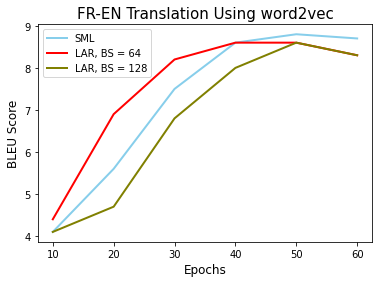

In [152]:
e = np.arange(10, 70, 10)
sml = np.asarray([4.1, 5.6, 7.5, 8.6, 8.8, 8.7])
lar = np.asarray([4.4, 6.9, 8.2, 8.6, 8.6, 8.3])
lar_128 = np.asarray([4.1, 4.7, 6.8, 8.0, 8.6, 8.3])

plt.plot(figsize=[12, 5])
plt.plot( e, sml, markersize=12, color='skyblue', linewidth=2, label = 'SML' )
plt.plot( e, lar, color='red', linewidth=2, label = 'LAR, BS = 64')
plt.plot( e, lar_128, color='olive', linewidth=2, label = 'LAR, BS = 128')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('BLEU Score', fontsize = 12)
plt.title('FR-EN Translation Using word2vec', fontsize=15)
plt.legend()
plt.savefig("FR-EN.jpg")